<a href="https://colab.research.google.com/github/chunjunghe/stat_class/blob/main/Mid_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


In [66]:
#한글 폰트 설정
import matplotlib.font_manager as fm
plt.rcParams['axes.unicode_minus'] = False
font_location = 'C:/Users/pc/Desktop/NanumGothic.ttf'

#ticks에 적용될 한글 폰트
font_ticks = fm.FontProperties(fname=font_location, size=10)
#title에 적용될 한글 폰트
font_title = fm.FontProperties(fname=font_location, size=13)



In [9]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


In [11]:
sns.__version__

'0.11.1'

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
from google.colab import files
uploaded = files.upload()


Saving new_people.csv to new_people.csv


In [45]:
people_raw = pd.read_csv('/content/new_people.csv', encoding = 'cp949')

In [46]:
from google.colab import files
uploaded = files.upload()


Saving process.csv to process.csv


In [47]:
process_raw = pd.read_csv('/content/process.csv')

In [48]:
from google.colab import files
uploaded = files.upload()

Saving suggest.csv to suggest.csv


In [49]:
suggest_raw = pd.read_csv('/content/suggest.csv')

In [50]:
print(people_raw.shape)
print(process_raw.shape)
print(suggest_raw.shape)

(5605, 16)
(68530, 28)
(62658, 12)


In [51]:
people = people_raw.copy()
process = process_raw.copy()
suggest = suggest_raw.copy()

## ***시간이 지남에 따라 법안 발의안의 개수가 어떻게 변화하는지 시각화***

In [53]:
sns.set(style = 'whitegrid')

In [54]:
suggest = suggest.replace({'':np.nan})
suggest['year'] = suggest['AGE'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})
suggest['PROPOSE_DT'] = pd.to_datetime(suggest['PROPOSE_DT'])

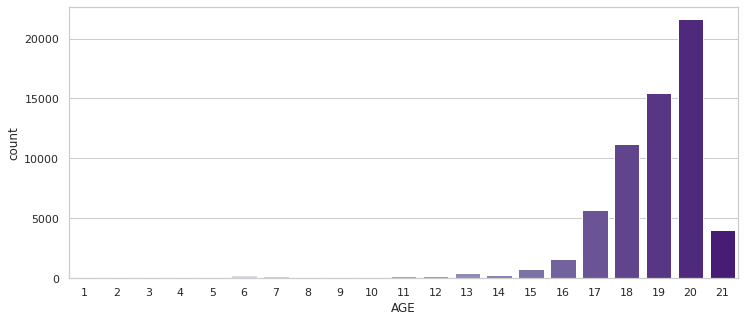

In [68]:
fig = plt.figure(figsize=(12, 5))
sns.countplot(data = suggest, x = 'AGE', palette = 'Purples',
              hue_order = list(suggest['AGE'].value_counts().sort_values(ascending=False).index))

##폰트 다시 확인하기
#plt.title('대 별 법안 발의안 개수', fontproperties = font_title)
#plt.xlabel('(대)', fontproperties = font_ticks)
#plt.ylabel('법안 발의안 수', fontproperties = font_ticks)
#plt.xticks(rotation = 70, fontproperties = font_ticks)


2004년 이후 법안 발의안 수가 급격히 증가하는 것을 확인할 수 있습니다.




## ***법안 심사 소관위원회의 종류 변화***

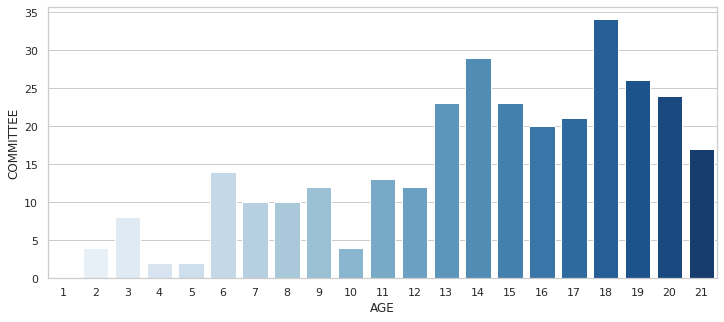

In [71]:
df = suggest.groupby('AGE')['COMMITTEE'].nunique().reset_index()
fig = plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='AGE', y='COMMITTEE', palette = 'Blues')

#plt.xlabel('(대)', fontproperties = font_ticks)
#plt.xticks(rotation = 70, fontproperties = font_ticks)
#plt.ylabel('소관위원회 수', fontproperties=font_ticks)
#plt.title('대 별 소관위원회 수', fontproperties=font_title)

시간이 흐르면서 심사를 담당하는 소관위원회의 종류도 다양해지는 것을 확인할 수 있습니다. 
즉, 시간이 지남에 따라 다양한 분야의 법안이 제안되고 있다는 것을 알 수 있습니다.

In [72]:
#과거 소관위원회 이름을 현재의 이름으로 바꾸기
replace_dict = {'안전행정위원회':'행정안전위원회', '교육문화체육관광위원회':'문화체육관광위원회', 
 '행정자치위원회':'행정안전위원회', '상업통상자원위원회':'상업통상자원중소벤처기업위원회', 
 '건설교통위원회':'국토교통위원회', '교육과학기술위원회':'교육위원회',
 '미래창조과학방송통신위원회': '과학기술정보방송통신위원회', '재정경제위원회':'기획재정위원회',
 '문화체육관광방송통신위원회': '문화체육관광위원회',
 '농림수산식품위원회': '농림축산식품해양수산위원회',
 '지식경제위원회': '기획재정위원회',
 '문화관광위원회': '문화체육관광위원회',
 '농림해양수산위원회': '농림축산식품해양수산위원회',
 '산업자원위원회': '산업통상자원중소벤처기업위원회',
 '정치개혁특별위원회': '특별위원회',
 '내무위원회': '정무위원회',
 '과학기술정보통신위원회': '과학기술정보방송통신위원회',
 '재무위원회': '기획재정위원회',
 '보건사회위원회': '보건복지위원회',
 '외교통상통일위원회': '외교통일위원회',
 '통일외교통상위원회': '외교통일위원회',
 '문교공보위원회': '문화체육관광위원회',
 '보건복지가족위원회': '보건복지위원회',
 '농림위원회': '농림축산식품해양수산위원회',
 '상공위원회': '기획재정위원회',
 '규제개혁특별위원회': '특별위원회',
 '건설위원회': '국토교통위원회',
 '농수산위원회': '농림축산식품해양수산위원회',
 '정치개혁 특별위원회': '특별위원회',
 '아동·여성대상 성폭력 대책 특별위원회': '윤리특별위원회',
 '민주발전을위한법률개폐특별위원회': '특별위원회',
 '경제과학위원회': '기획재정위원회',
 '농림수산위원회': '농림축산식품해양수산위원회',
 '교통체신위원회': '국토교통위원회',
 '노동위원회': '환경노동위원회',
 '행정위원회': '행정안전위원회',
 '문화체육공보위원회': '문화체육관광위원회',
 '공항·발전소·액화천연가스인수기지주변대책특별위원회': '특별위원회',
 '교육체육청소년위원회': '교육위원회',
 '헌법개정 및 정치개혁 특별위원회': '특별위원회',
 '여성위원회': '여성가족위원회',
 '정치관계법심의특별위원회': '특별위원회',
 '문화공보위원회': '문화체육관광위원회',
 '통상산업위원회': '기획재정위원회',
 '공무원연금개혁 특별위원회': '특별위원회',
 '저출산고령화대책특별위원회': '특별위원회',
 '평창동계올림픽 및 국제경기대회지원특별위원회': '특별위원회',
 '동력자원위원회': '국토교통위원회',
 '방송통신특별위원회': '과학기술정보방송통신위원회',
 '국제경기대회지원특별위원회': '특별위원회',
 '문교체육위원회': '문화체육관광위원회',
 '세계박람회지원특별위원회': '특별위원회',
 '지방행정체제개편특별위원회': '특별위원회',
 '사법제도개혁특별위원회': '특별위원회',
 '상공자원위원회': '기획재정위원회',
 '외무통일위원회': '외교통일위원회',
 '과거사진상규명에관한특별위원회': '윤리특별위원회',
 '제24회서울올림픽대회지원특별위원회': '특별위원회',
 '재정제도개혁특별위원회': '특별위원회',
 '국제경기대회(세계육상선수권대회, 아시아경기대회, 포뮬러원국제자동차경주대회)지원특별위원회': '특별위원회',
 '통신과학기술위원회': '과학기술정보방송통신위원회',
 '통일외무위원회': '외교통일위원회',
 '정치개혁입법특별위원회': '특별위원회',
 '가축전염병예방법개정특별위원회': '특별위원회',
 '국제경기대회개최 및 유치지원특별위원회': '특별위원회',
 '기후변화대책특별위원회': '특별위원회',
 '행정경제위원회': '기획재정위원회',
 '2012년 여수세계박람회지원특별위원회': '특별위원회',
 '외무위원회': '외교통일위원회',
 '정당법및선거관계법개정법률심사특별위원회': '특별위원회',
 '5·18광주민주화운동특별위원회': '특별위원회',
 '특위': '특별위원회',
 '감찰위원회법안 기초특별위원회': '특별위원회',
 '체신과학기술위원회': '과학기술정보방송통신위원회',
 '지방자치특별위원회': '특별위원회',
 '정당법및선거관계법개정법률안심사특별위원회': '특별위원회',
 '국회법및국회상임위원회위원정수에관한규칙개정특별위원회': '특별위원회',
 '기후변화대응·녹색성장특별위원회': '특별위원회',
 '올림픽특별위원회': '특별위원회',
 '사회보건위원회': '보건복지위원회',
 '사법개혁 특별위원회': '특별위원회',
 '문교위원회': '문화체육관광위원회',
 '대전국제무역산업박람지원특별위원회': '특별위원회',
 '장애인에 대한 성폭력 등 인권침해 방지대책특별위원회': '윤리특별위원회',
 '산업통상자원위원회':'산업통상자원중소벤처기업위원회'}

In [73]:
suggest['committee_curr'] = suggest['COMMITTEE'].replace(replace_dict)
suggest['propose_year'] = suggest['PROPOSE_DT'].dt.year

## **소관위원회 별 법안 발의안 심사 추이**

In [74]:
stopwords = set(STOPWORDS) 
stopwords.add('에')
stopwords.add('관한')
stopwords.add('일부개정법률안')
stopwords.add('법')
stopwords.add('대한')
stopwords.add(',')
stopwords.add('법률')
stopwords.add('법률안')
stopwords.add('등')
stopwords.add('및')
stopwords.add('등에')
stopwords.add('지원에')
stopwords.add('관리에')
stopwords.add('운영에')
stopwords.add('처리에')
stopwords.add('특별법')
stopwords.add('특별조치법')
stopwords.add('특례법')

<Figure size 1080x1080 with 0 Axes>

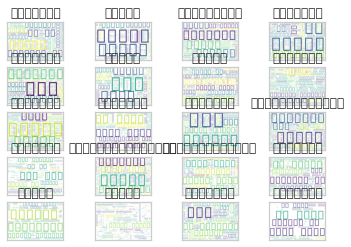

In [76]:
fig = plt.figure(figsize = (15,15))
#폰트 확인하기폰트 확인하기
i = 1
for committee in list(suggest['committee_curr'].unique())[1:]:
    name = ','.join(suggest.loc[suggest.committee_curr == committee, 'BILL_NAME'])
        wc = WordCloud(background_color='white',
                        #font_path = font_path,
                                        width=600,
                                                        height=400,
                                                                        stopwords=stopwords).generate(name)
                                                                            plt.subplot(5,4,i)

i = 1
for committee in list(suggest['committee_curr'].unique())[1:]:
    name = ','.join(suggest.loc[suggest.committee_curr == committee, 'BILL_NAME'])
    wc = WordCloud(background_color='white',
                #font_path = font_path,
                width=600,
                height=400,
                stopwords=stopwords).generate(name)
    plt.subplot(5,4,i)
    plt.imshow(wc)
    plt.xticks([])
    plt.yticks([])
    #plt.title(committee,fontproperties = font_title)
    i += 1

이를 통해 각 소관위원회가 어떤 의안을 심사하는지 파악할 수 있습니다.